<h2> DATA 115: Introduction to Data Analytics. Fall 2024 </h2>
<h3> Problem Set 5 </h3>
<h3> Team <i> (Insert your group number here) </i></h3>
<h3> Type students' names <i> (only those who contributed to the group work)</i> here</h3>

*Note that the problems below are identical to those you had in Problem Sets 2, 3, and 4. Hence, you have the solutions available to you. Your task is to show how these solutions can be obtained* **using R (not Python).**

#### 1. Load the data in `GME_Stock` as a dataframe in R. 

##### (a) Plot the values in the closing prices column as a line plot.

##### (b) Make a scatterplot of opening prices vs. closing prices.

##### (c) Add a new column to your dataframe whose rows represent the change in price during each day and make a histogram of these values.

##### (d) Make a bar chart presenting the in-state tuition data presented in this table:

| School | WSU | EWU | UW | UI | CWU |
|:-:|:-:|:-:|:-:|:-:|:-:|
| **Tuition** | 11841 | 7526 | 11465 | 8304 | 8273 |


##### (e) Provide a brief justification for the order you placed the bars from left to right in (d).
##### The bars are arranged from left to right based on tuition costs in descending order to easily see which school has the highest tuition.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
gme_stock_df = pd.read_csv('./GME_Stock.csv')

#a: Plot the values in the closing prices column as a line plot.
plt.figure(figsize=(10, 6))
plt.plot(gme_stock_df['Date'], gme_stock_df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('GME Stock Closing Prices Over Time')
# Have to change about of days shown to avoid unreadable x-axis labels
plt.xticks(gme_stock_df['Date'][::50], rotation=45, ha="right")  # Show every 50th date
plt.tight_layout()
plt.legend()
plt.show()


#b: Make a scatterplot of opening prices vs. closing prices.
plt.figure(figsize=(10, 6))
plt.scatter(gme_stock_df['Open'], gme_stock_df['Close'], alpha=0.5)
plt.xlabel('Opening Price ($)')
plt.ylabel('Closing Price ($)')
plt.title('Opening Prices vs Closing Prices')
plt.tight_layout()
plt.show()


#c Add a new column to your dataframe whose rows represent the change in price during each day and make a histogram of these values
gme_stock_df['Price Change'] = gme_stock_df['Close'] - gme_stock_df['Open']
plt.figure(figsize=(10, 6))
plt.hist(gme_stock_df['Price Change'], bins=50, edgecolor='black')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Price Change for GME Stock')
plt.tight_layout()
plt.show()

#d: Make a bar chart presenting the in-state tuition data presented in this table
schools = ['WSU', 'UW', 'UI', 'CWU', 'EWU']
tuition = [11841, 11465, 8304, 8273, 7526]
# Bar chart for tuition data
plt.figure(figsize=(10, 6))
plt.bar(schools, tuition, edgecolor='black')
plt.xlabel('School')
plt.ylabel('Tuition ($)')
plt.title('In-State Tuition by School')
plt.tight_layout()
plt.show()

#e: The bars are arranged from left to right based on tuition costs in descending order to easily see which school has the highest tuition.

#### 2. Load the data in `Advertising` as a dataframe in R. 

##### (a) Each row of this data set represents a single media market and the `TV`, `newspaper`, and `radio` variables contain spending amount related to each media type while the `sales` variable is the number of units sold (in thousands) in that market. Make a scatterplot matrix of these variables. Based on this plot, do you think multiple linear regression is appropriate to attempt? Briefly explain.

##### (b) Fit a multiple linear regression model using all three media variables as predictors with the sales column as the response variable.

##### (c) Write the linear regression equation and report the value of the coefficient of determination.
##### Sales = B0 + B1(TV) + B2(Radio) + B3(Newspaper)
##### Sales= 2.9389+0.0458(TV)+0.1885(Radio)−0.0010(Newspaper)

##### (d) How many sales would your model predict for a market that spent 200 on TV, 50 on radio, and 100 on newspaper?
##### Sales=2.9389+9.16+9.425−0.1=21.4239

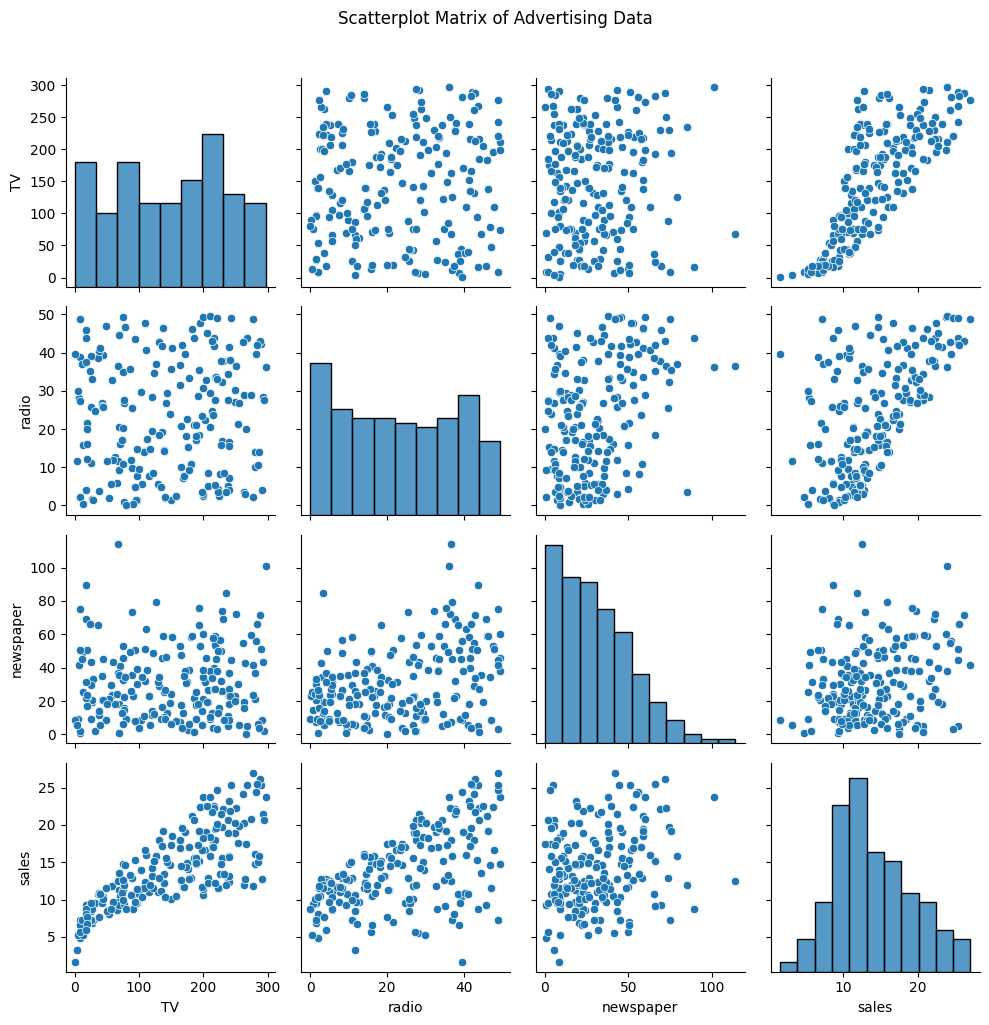

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.58e-96
Time:                        16:39:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

advertising_df = pd.read_csv('./Advertising.csv')
import seaborn as sns
import matplotlib.pyplot as plt

# scatterplot matrix
sns.pairplot(advertising_df[['TV', 'radio', 'newspaper', 'sales']])
plt.suptitle('Scatterplot Matrix of Advertising Data', y=1.02)
plt.tight_layout()
plt.show()


# multiple linear regression
X = advertising_df[['TV', 'radio', 'newspaper']]
y = advertising_df['sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model_summary = model.summary()
model_summary


#c linear regression


#### 3. Load the data in `defaults` as a dataframe in R. 

##### (a) Fit a logistic regression model to this data with `default` as the response variable and `balance` as a predictor variable.

##### (b) Compute the coefficients of the fitted model and write the corresponding equation for the log odds.
Log Odds Equation: log(odds) = -10.6513 + 0.0055 * balance

##### (c) What percentage of the provided data does your model correctly classify?
97.25%

##### (d) Use your model to predict whether someone with a balance of 1950 is likely to default. What is the corresponding probability of this individual defaulting according to your regression model?
Someone with a balance of 1950 IS likely to default. Probability is 51.79%

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_csv('defaults.csv')
df['default_binary'] = df['default'].map({'Yes': 1, 'No': 0})

X = df[['balance']]
y = df['default_binary']

model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X, y)

intercept = model.intercept_[0]
coef_balance = model.coef_[0][0]
print(f"Log Odds Equation: log(odds) = {intercept:.4f} + {coef_balance:.4f} * balance")

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

balance_1950 = pd.DataFrame({'balance': [1950]})
prob_default = model.predict_proba(balance_1950)[0][1]
predicted_class = "Yes" if model.predict(balance_1950)[0] == 1 else "No"
print(f"Prediction for balance=1950: Class={predicted_class}, Probability={prob_default:.4f}")

Log Odds Equation: log(odds) = -10.6513 + 0.0055 * balance
Model Accuracy: 97.25%
Prediction for balance=1950: Class=Yes, Probability=0.5179


#### 4. Load the data in `iris_data` as a dataframe in R. This is a classic dataset (originally published in 1936) that is frequently used as an initial set of test data. It consists of four numerical columns reporting the length and width of the sepal and petals of 150 iris plants and a final column reporting the specific subspecies. The data file also has an additional column with numerical column representing the subspecies. 

##### (a) Make a scatterplot of petal width vs. petal length colored by the subspecies.

##### (b) Perform PCA on the data with the four numerical columns as inputs and make a scatter plot of the top two principal components colored by subspecies.

##### (c) What proportion of the variance is explained by these two components?

##### (d) What are the loadings for each of the original numerical columns?

#### 5. Continue working with `iris_data` dataframe.

##### (a) Apply k-means clustering to the four numeric columns with three clusters.

##### (b) Apply k-means clustering to the two principal components with three clusters.

##### (c) Which of the two k-means clusterings is more accurate at predicting the subspecies correctly?